# MBS Trend Convexity Background Research

In [15]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from   matplotlib.ticker import FuncFormatter


In [2]:
sys.path.append(r"C:\Users\Diego\Desktop\app_prod\research\MBSTrendConvexity\root\src")
from MBSDataPrep import DataPrep

## Societe Generale Interest Rate Trend Following

There are well documented resources regarding replication of trend following indices. *Koulajian & Czkwianianc (2010)* at Quest Partners LLC in [Black Box Trend Following – Lifting the Veil](https://www.questpartnersllc.com/downloads/Quest_Research_Series_-_No_1_Trend_Following_-_September_2010.pdf) show that trend following indices can be replicated with 10x100MA signals on futures contracts. A more complex approach is provided by *Dao, Ngyuen, Lempérière, Bouchaud, and Potters* at Capital Fund Management in [Tail protection for long investors: Trend convexity at work](https://arxiv.org/abs/1607.02410) provide a more complex approach to recreating the SG Trend follower index. Their signal is generated via 180d EWMA of nominal differenced futures priced scaled by a volatility constant to account for heteroskedasticity and give the returns unit variance. Their results give 82% replication to SG Trend follower. While *Yang & Qian* at PanAgora Asset Management in [Protecting the Downside of Trend When It Is Not Your Friend](https://www.panagora.com/insights/protecting-the-downside-of-trend-when-it-is-not-your-friend/) give a counter example - implying that sophisticated trend signals provide significant returns versus simplistic trend following models this notebook will include SGI Interest Trend index as well.

In this case the replicating trend follower will use the following methods <br>
1. Strategy consisting of US Treasury Futures
2. 10x100 EWMAC Signal
3. Equal Weight and Equal Volatility Contribution Portfolio Optimization

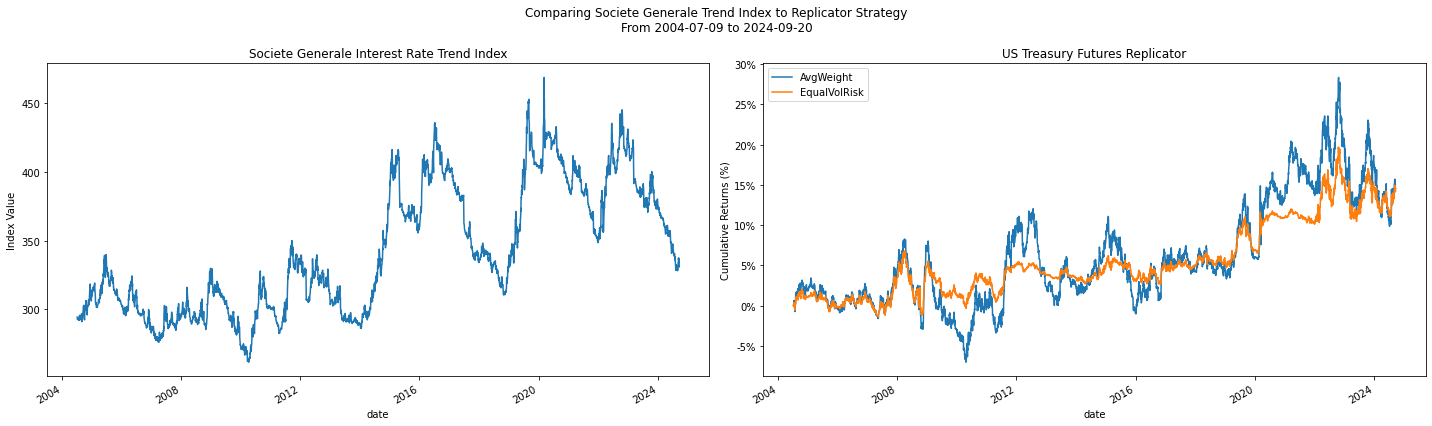

In [23]:
def plot_index_replicator() -> plt.Figure:
    
    df_tmp = DataPrep().replicate_sg_index()
    col_groups = {
        "SG":         ["SocGenTrend"],
        "Replicator": ["AvgWeight", "EqualVolRisk"]}

    fig, axes = plt.subplots(ncols = len(col_groups.keys()), figsize = (20,6))
    for col, ax in zip(col_groups.keys(), axes.flatten()):

        (df_tmp[
            col_groups[col]].
            plot(
                ax = ax))

        if col == "SG": 

            ax.legend().set_visible(False)
            ax.set_ylabel("Index Value")
            ax.set_title("Societe Generale Interest Rate Trend Index")

        else: 

            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x*100:.0f}%"))
            ax.set_ylabel("Cumulative Returns (%)")
            ax.set_title("US Treasury Futures Replicator")

    fig.suptitle("Comparing Societe Generale Trend Index to Replicator Strategy\nFrom {} to {}".format(
        df_tmp.index.min().date(),
        df_tmp.index.max().date()))

    plt.tight_layout()
    
plot_index_replicator()

Now compare the correlation of all strategies. 

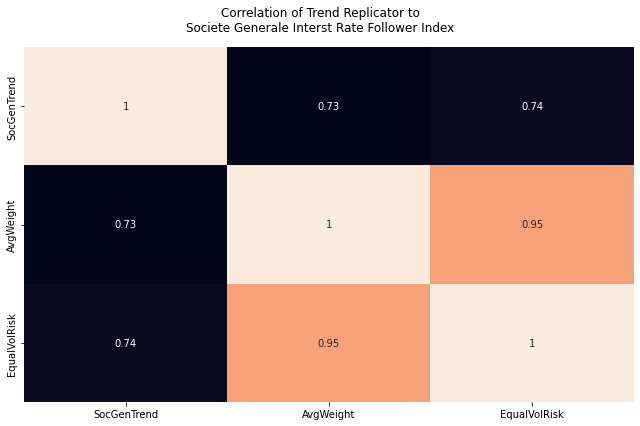

In [36]:
def plot_correlation() -> plt.Figure:
    
    fig, axes = plt.subplots(figsize = (9,6))

    sns.heatmap(
        data  = DataPrep().replicate_sg_index().corr(),
        annot = True,
        cbar  = False,
        ax    = axes)

    fig.suptitle("Correlation of Trend Replicator to\nSociete Generale Interst Rate Follower Index")
    plt.tight_layout()
    
plot_correlation()

The correlation is considerably high for how generic the replicator is. The correlation is not as good as the ones in within the papers listed likely for the following reasons <br>
1. Uses solely US Treasury Futures
2. Uses generic Trend following techinques
3. Uses simplistic portfolio optimization
4. The index uses some volatility scaling